> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: FBI Gun Data Project Nitin Ramchand Lalwani for Udacity Data Analytics Nanodegree

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
census_data = pd.read_csv('U.S. Census Data.csv')
census_data.head()

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
census_data.shape

(85, 52)

In [5]:
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,(a),(c),"""01""",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,0.016,0.048,50.40%,2.50%,1.90%,"8,001,041",18.90%,1.50%,6.30%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [7]:
census_data.fillna(0,inplace=True)
census_data


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [8]:
census_data_test = census_data['Fact Note'] ==0
census_data_test2 = census_data['Fact'] ==0
census_data_test3 = census_data_test & census_data_test2
census_data_test3

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65     True
66    False
67     True
68    False
69    False
70     True
71    False
72    False
73    False
74    False
75     True
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
Length: 85, dtype: bool

In [9]:
census_data_FactNote0_and_Fact=census_data[census_data_test3]
census_data_FactNote0_and_Fact

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
census_data[census_data['Fact'] !=0]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [11]:
census_data[census_data['Fact Note'] ==0]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [12]:
census_data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [13]:

census_data_test = census_data[census_data['Fact Note'] ==0]
census_data_test
        

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [14]:
census_data = census_data[census_data['Alabama'] != 0]
len(census_data)


65

In [15]:
census_data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",0,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",0,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",0,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [16]:
census_data.groupby('Fact').groups

{'All firms, 2012': Int64Index([55], dtype='int64'),
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': Int64Index([14], dtype='int64'),
 'Asian alone, percent, July 1, 2016,  (V2016)': Int64Index([15], dtype='int64'),
 "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": Int64Index([35], dtype='int64'),
 'Black or African American alone, percent, July 1, 2016,  (V2016)': Int64Index([13], dtype='int64'),
 'Building permits, 2016': Int64Index([29], dtype='int64'),
 'FIPS Code': Int64Index([64], dtype='int64'),
 'Female persons, percent,  July 1, 2016,  (V2016)': Int64Index([10], dtype='int64'),
 'Female persons, percent, April 1, 2010': Int64Index([11], dtype='int64'),
 'Foreign born persons, percent, 2011-2015': Int64Index([21], dtype='int64'),
 'High school graduate or higher, percent of persons age 25 years+, 2011-2015': Int64Index([34], dtype='int64'),
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)': Int64Index([18], dtype='int

In [17]:
print (((census_data['Fact'].str.contains("2016")) & (census_data['Fact'].str.contains("percent"))).sum())
print census_data['Fact'].str.contains("V2016").sum()

13
16


In [18]:
census_data_containing_2016 = census_data[census_data['Fact'].str.contains("V2016")]
census_data_containing_2016_and_percent = census_data[(census_data['Fact'].str.contains("2016")) & (census_data['Fact'].str.contains("percent"))]

In [19]:
census_data_containing_2016_and_percent

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",0,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%


In [20]:
census_data['Fact'].str.contains("2016","2010")


0      True
1      True
2      True
3     False
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28    False
29     True
      ...  
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
Name: Fact, Length: 65, dtype: bool

In [21]:
gun_data = pd.read_excel('gun_data.xlsx')
print len(gun_data)
print (len(gun_data['month'].unique())*len(gun_data['state'].unique()))

12485
12485


In [22]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [23]:
gun_data['month'].unique()

array([u'2017-09', u'2017-08', u'2017-07', u'2017-06', u'2017-05',
       u'2017-04', u'2017-03', u'2017-02', u'2017-01', u'2016-12',
       u'2016-11', u'2016-10', u'2016-09', u'2016-08', u'2016-07',
       u'2016-06', u'2016-05', u'2016-04', u'2016-03', u'2016-02',
       u'2016-01', u'2015-12', u'2015-11', u'2015-10', u'2015-09',
       u'2015-08', u'2015-07', u'2015-06', u'2015-05', u'2015-04',
       u'2015-03', u'2015-02', u'2015-01', u'2014-12', u'2014-11',
       u'2014-10', u'2014-09', u'2014-08', u'2014-07', u'2014-06',
       u'2014-05', u'2014-04', u'2014-03', u'2014-02', u'2014-01',
       u'2013-12', u'2013-11', u'2013-10', u'2013-09', u'2013-08',
       u'2013-07', u'2013-06', u'2013-05', u'2013-04', u'2013-03',
       u'2013-02', u'2013-01', u'2012-12', u'2012-11', u'2012-10',
       u'2012-09', u'2012-08', u'2012-07', u'2012-06', u'2012-05',
       u'2012-04', u'2012-03', u'2012-02', u'2012-01', u'2011-12',
       u'2011-11', u'2011-10', u'2011-09', u'2011-08', u'2011-

In [24]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [25]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [26]:
gun_data.shape

(12485, 27)

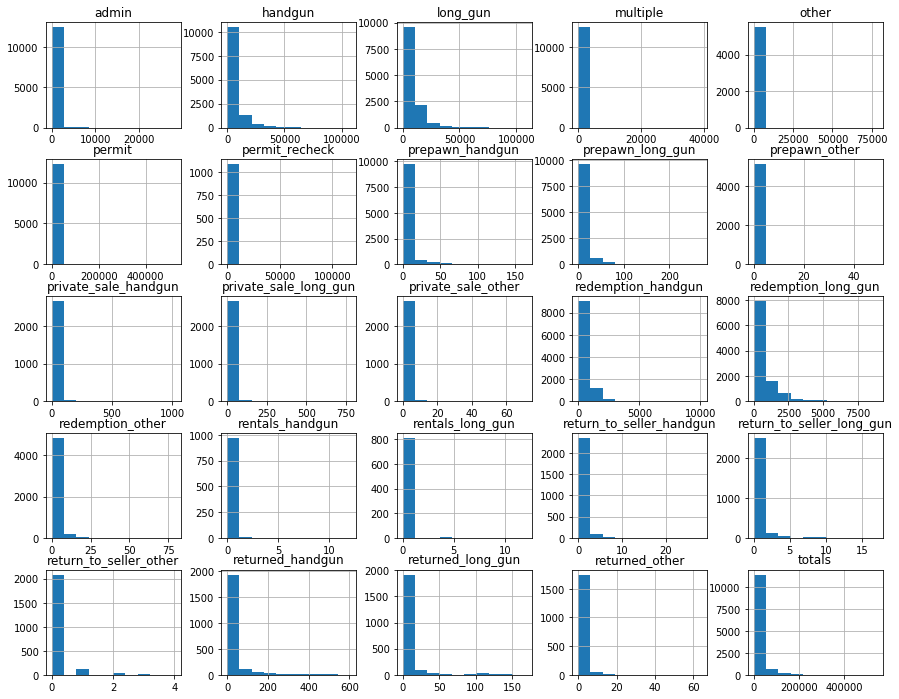

In [27]:
gun_data.hist(figsize=(15,12));

In [28]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [29]:
len(gun_data['state'].unique())

55

In [30]:
print gun_data['handgun'].sum()

74053083.0


In [31]:
##compare sum of loaned andetc with sum of total to see if matches
print

In [32]:
gun_data_totals = gun_data[['month','state','permit','permit_recheck','totals']]
gun_data_totals.head()

,month,state,permit,permit_recheck,totals
0,2017-09,Alabama,16717.0,0.0,32019
1,2017-09,Alaska,209.0,2.0,6303
2,2017-09,Arizona,5069.0,382.0,28394
3,2017-09,Arkansas,2935.0,632.0,17747
4,2017-09,California,57839.0,0.0,123506


In [33]:
gun_data_totals.fillna(0,inplace=True)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [34]:
gun_data_totals

,month,state,permit,permit_recheck,totals
0,2017-09,Alabama,16717.0,0.0,32019
1,2017-09,Alaska,209.0,2.0,6303
2,2017-09,Arizona,5069.0,382.0,28394
3,2017-09,Arkansas,2935.0,632.0,17747
4,2017-09,California,57839.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,12117
7,2017-09,Delaware,275.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,61
9,2017-09,Florida,10784.0,0.0,77390


In [35]:
len(gun_data_totals[gun_data_totals['state'].str.match('District of Columbia')])

227

In [36]:
gun_data_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
month             12485 non-null object
state             12485 non-null object
permit            12485 non-null float64
permit_recheck    12485 non-null float64
totals            12485 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


In [37]:
gun_data_totals['month'] = pd.to_datetime(gun_data_totals['month'], yearfirst=True, format="%Y-%M")

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
gun_data_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
month             12485 non-null datetime64[ns]
state             12485 non-null object
permit            12485 non-null float64
permit_recheck    12485 non-null float64
totals            12485 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 487.8+ KB


In [39]:
gun_data_totals.head()

,month,state,permit,permit_recheck,totals
0,2017-01-01 00:09:00,Alabama,16717.0,0.0,32019
1,2017-01-01 00:09:00,Alaska,209.0,2.0,6303
2,2017-01-01 00:09:00,Arizona,5069.0,382.0,28394
3,2017-01-01 00:09:00,Arkansas,2935.0,632.0,17747
4,2017-01-01 00:09:00,California,57839.0,0.0,123506


In [40]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [41]:
gun_data_totals['month'].unique()

array(['2017-01-01T00:09:00.000000000', '2017-01-01T00:08:00.000000000',
       '2017-01-01T00:07:00.000000000', '2017-01-01T00:06:00.000000000',
       '2017-01-01T00:05:00.000000000', '2017-01-01T00:04:00.000000000',
       '2017-01-01T00:03:00.000000000', '2017-01-01T00:02:00.000000000',
       '2017-01-01T00:01:00.000000000', '2016-01-01T00:12:00.000000000',
       '2016-01-01T00:11:00.000000000', '2016-01-01T00:10:00.000000000',
       '2016-01-01T00:09:00.000000000', '2016-01-01T00:08:00.000000000',
       '2016-01-01T00:07:00.000000000', '2016-01-01T00:06:00.000000000',
       '2016-01-01T00:05:00.000000000', '2016-01-01T00:04:00.000000000',
       '2016-01-01T00:03:00.000000000', '2016-01-01T00:02:00.000000000',
       '2016-01-01T00:01:00.000000000', '2015-01-01T00:12:00.000000000',
       '2015-01-01T00:11:00.000000000', '2015-01-01T00:10:00.000000000',
       '2015-01-01T00:09:00.000000000', '2015-01-01T00:08:00.000000000',
       '2015-01-01T00:07:00.000000000', '2015-01-01

In [42]:
gun_data_totals_2016 = gun_data_totals[(gun_data_totals['month'] >= '2016-01-01 00:00:00') & (gun_data_totals['month'] < '2017-01-01 00:00:00')]

In [43]:
gun_data_totals

,month,state,permit,permit_recheck,totals
0,2017-01-01 00:09:00,Alabama,16717.0,0.0,32019
1,2017-01-01 00:09:00,Alaska,209.0,2.0,6303
2,2017-01-01 00:09:00,Arizona,5069.0,382.0,28394
3,2017-01-01 00:09:00,Arkansas,2935.0,632.0,17747
4,2017-01-01 00:09:00,California,57839.0,0.0,123506
5,2017-01-01 00:09:00,Colorado,4356.0,0.0,35873
6,2017-01-01 00:09:00,Connecticut,4343.0,673.0,12117
7,2017-01-01 00:09:00,Delaware,275.0,0.0,3502
8,2017-01-01 00:09:00,District of Columbia,1.0,0.0,61
9,2017-01-01 00:09:00,Florida,10784.0,0.0,77390


In [44]:
grouped_state_gun_data_2016 = gun_data_totals_2016.groupby('state').mean()[['totals']]

In [45]:
grouped_state_gun_data_2016

,totals
state,
Alabama,51412.250000
Alaska,7303.916667
Arizona,34689.916667
Arkansas,22167.833333
California,198097.250000
Colorado,45042.833333
Connecticut,26474.333333
Delaware,4952.500000
District of Columbia,72.916667


In [46]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",0,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [47]:
census_data_containing_2016_and_percent

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons 65 years and over, percent, July 1, 2...",0,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",0,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%


In [48]:
census_data_containing_2016_and_percent.groupby('Fact').groups

{'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': Int64Index([14], dtype='int64'),
 'Asian alone, percent, July 1, 2016,  (V2016)': Int64Index([15], dtype='int64'),
 'Black or African American alone, percent, July 1, 2016,  (V2016)': Int64Index([13], dtype='int64'),
 'Female persons, percent,  July 1, 2016,  (V2016)': Int64Index([10], dtype='int64'),
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)': Int64Index([18], dtype='int64'),
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)': Int64Index([16], dtype='int64'),
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)': Int64Index([8], dtype='int64'),
 'Persons under 18 years, percent, July 1, 2016,  (V2016)': Int64Index([6], dtype='int64'),
 'Persons under 5 years, percent, July 1, 2016,  (V2016)': Int64Index([4], dtype='int64'),
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)': Int64Index([2], dtype='int64'),
 'Two or Mo

In [49]:
census_data_containing_2016.groupby('Fact').groups

{'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': Int64Index([14], dtype='int64'),
 'Asian alone, percent, July 1, 2016,  (V2016)': Int64Index([15], dtype='int64'),
 'Black or African American alone, percent, July 1, 2016,  (V2016)': Int64Index([13], dtype='int64'),
 'Female persons, percent,  July 1, 2016,  (V2016)': Int64Index([10], dtype='int64'),
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)': Int64Index([18], dtype='int64'),
 'Housing units,  July 1, 2016,  (V2016)': Int64Index([22], dtype='int64'),
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)': Int64Index([16], dtype='int64'),
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)': Int64Index([8], dtype='int64'),
 'Persons under 18 years, percent, July 1, 2016,  (V2016)': Int64Index([6], dtype='int64'),
 'Persons under 5 years, percent, July 1, 2016,  (V2016)': Int64Index([4], dtype='int64'),
 'Population estimates base, April 1, 2010,  (V2016)': In

In [50]:
census_data_containing_2016.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",0,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",0,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%


In [51]:
grouped_state_gun_data_2016.head()

,totals
state,
Alabama,51412.250000
Alaska,7303.916667
Arizona,34689.916667
Arkansas,22167.833333
California,198097.250000


In [52]:
census_data_containing_2016_transposed_cleaned = census_data_containing_2016.transpose().drop(['Fact Note'], axis=0)

In [53]:
census_data_containing_2016_transposed_cleaned.head()

,0,1,2,4,6,8,10,12,13,14,15,16,17,18,19,22
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Persons under 5 years, percent, July 1, 2016, ...","Persons under 18 years, percent, July 1, 2016,...","Persons 65 years and over, percent, July 1, 2...","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Housing units, July 1, 2016, (V2016)"
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762"


In [54]:
census_data_containing_2016_transposed_cleaned.columns = census_data_containing_2016_transposed_cleaned.loc['Fact']
census_data_containing_2016_transposed_cleaned = census_data_containing_2016_transposed_cleaned.drop(['Fact'], axis=0)

In [55]:
census_data_containing_2016_transposed_cleaned.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)"
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525"


In [56]:
merged_data_2016_v2 = census_data_containing_2016_transposed_cleaned.merge(grouped_state_gun_data_2016,how='left',left_index=True,right_index=True)

In [57]:
merged_data_2016_v2

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)",totals
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185",51412.250000
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658",7303.916667
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003",34689.916667
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762",22167.833333
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525",198097.250000
Colorado,"5,540,545","5,029,324",10.20%,6.10%,22.80%,13.40%,49.70%,87.50%,4.50%,1.60%,3.30%,0.20%,3.00%,21.30%,68.60%,"2,339,118",45042.833333
Connecticut,"3,576,452","3,574,114",0.10%,5.20%,21.10%,16.10%,51.20%,80.60%,11.80%,0.50%,4.70%,0.10%,2.30%,15.70%,67.70%,"1,499,116",26474.333333
Delaware,"952,065","897,936",6.00%,5.80%,21.50%,17.50%,51.60%,70.10%,22.60%,0.60%,4.00%,0.10%,2.60%,9.20%,62.90%,"426,149",4952.500000
Florida,"20,612,439","18,804,592",9.60%,5.50%,20.10%,19.90%,51.10%,77.60%,16.80%,0.50%,2.90%,0.10%,2.10%,24.90%,54.90%,"9,301,642",119611.666667
Georgia,"10,310,371","9,688,680",6.40%,6.40%,24.40%,13.10%,51.30%,61.20%,32.00%,0.50%,4.10%,0.10%,2.10%,9.40%,53.40%,"4,218,776",51082.083333


In [58]:
merged_data_2016_v2['weighted_mean_2016'] = merged_data_2016_v2['Persons under 5 years, percent, July 1, 2016, (V2016)']*merged_data_2016_v2[]

SyntaxError: invalid syntax (<ipython-input-58-4188444ef2e3>, line 1)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
import test

from test import test2, test
test()

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Part of the assumptions taken are that a firearm background check implies a firemarm sale and this is the one-to one correlation that has been made in order to show the results in this report. In reality this will vary based on state laws and purchase scenarios.